In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import Libraries

In [22]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Loading Data

In [7]:
df = pd.read_csv("alzheimers_disease_data.csv", index_col=0)

In [8]:
display(df.head())

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
PatientID,,,,,,,,,,,,,,,,,,,,,
4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [10]:
# drop the column for doctor in charge
df = df.drop(df.columns[-1], axis=1)

In [11]:
df.shape

(2149, 33)

In [12]:
# Checking type of features
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

In [13]:
# Check for null values
columns_with_null = df.columns[df.isnull().any()]
print("Columns with null values:", list(columns_with_null))

Columns with null values: []


### Heatmap

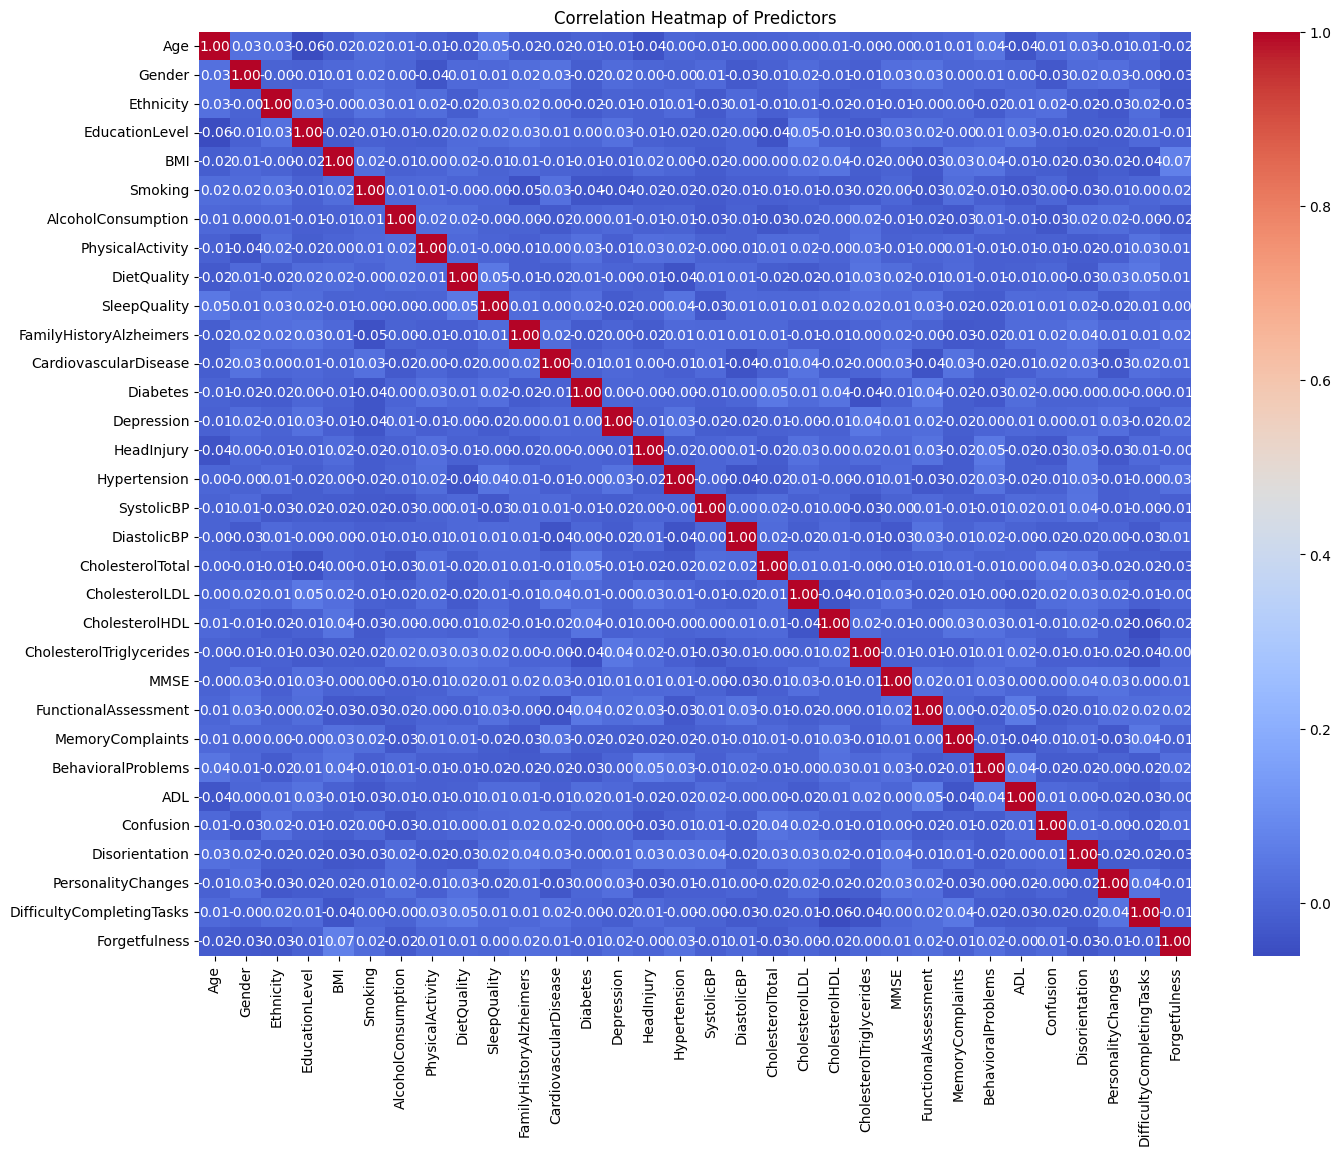

In [24]:
# Exclude target variable
predictors = df.drop(columns=['Diagnosis'])

# Compute correlation matrix
corr_matrix = predictors.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Predictors")
plt.savefig("heatmap.jpg")
plt.show()


No highly correlated variables.

In [23]:
X = df.drop(columns=['Diagnosis'])  # Predictors
y = df['Diagnosis']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the models
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),  # Scaling is important for LR
        ('model', LogisticRegression())
    ]),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
results = {}
for model_name, pipeline in models.items():
    pipeline.fit(X_train, y_train)  # Train the model
    y_pred = pipeline.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[model_name] = accuracy
    
    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Print overall results
print("Summary of Model Accuracies:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.74      0.74      0.74       152

    accuracy                           0.82       430
   macro avg       0.80      0.80      0.80       430
weighted avg       0.82      0.82      0.82       430

--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       278
           1       0.83      0.86      0.84       152

    accuracy                           0.89       430
   macro avg       0.88      0.88      0.88       430
weighted avg       0.89      0.89      0.89       430

--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy     